In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')


import nltk
nltk.download('stopwords')


import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC             

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tusas=pd.read_csv("Tweets.csv")
tusas

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
nRowsRead = 1000
df1 = pd.read_csv('D:\\Data Science and Machine Learning Basic to Advanced\\Data Science And Analysis\\files\\Project\\Twitter US Airline Sentiment\\Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 15 columns


In [4]:
df1.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tusas.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

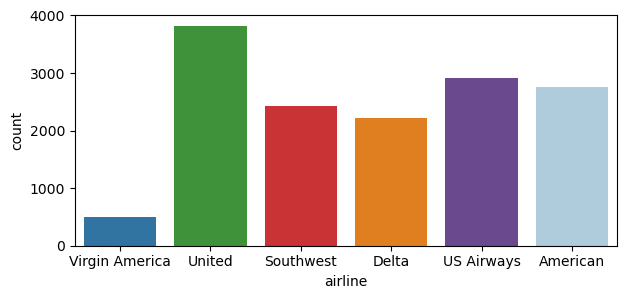

In [6]:
plt.figure(figsize=(7,3))
sns.countplot(data=tusas,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

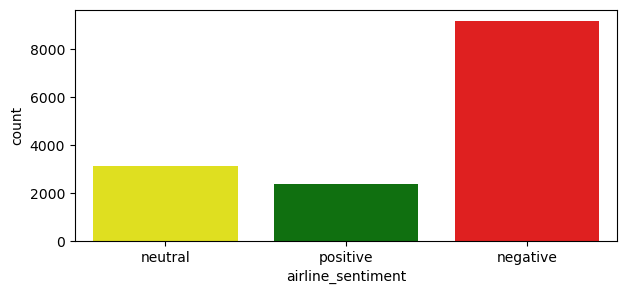

In [7]:
plt.figure(figsize=(7,3))
sns.countplot(data=tusas,x='airline_sentiment',palette=['yellow', 'green','red'])
plt.show()

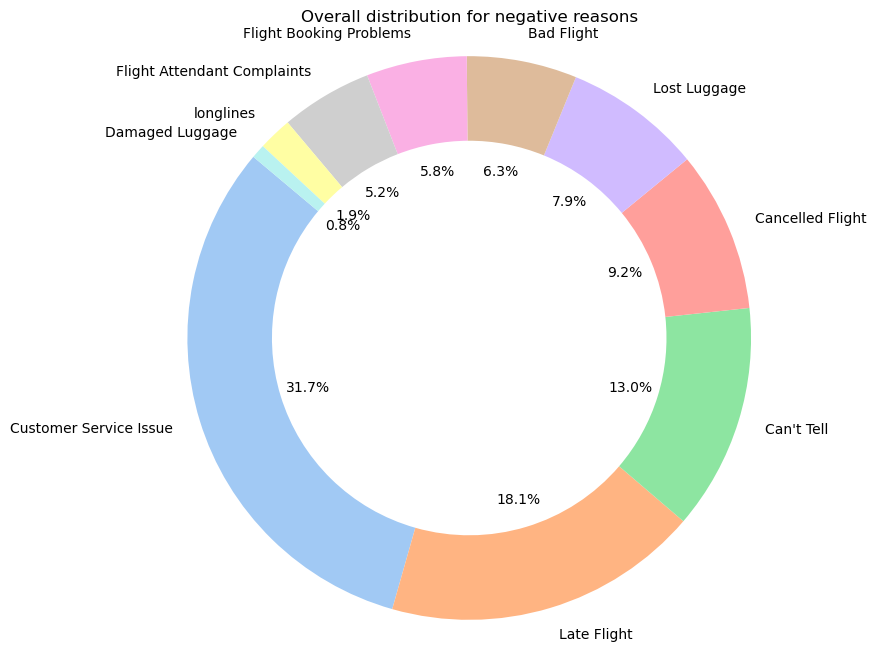

In [8]:
value_counts = tusas['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)] 
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')
plt.show()

In [15]:
corpus = []
ps=PorterStemmer()
for i in range(len(tusas)):
    # Removing special characters from text(message)
    review = re.sub('[^a-zA-Z]', ' ', tusas['text'][i])
    
    # Converting entire text into lower case
    review = review.lower()
    
    # Splitting our text into words
    review = review.split()
    
    # Stemming and removing stopwords
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # Joining all the words into a comple text
    review = ' '.join(review)
    
    # Appending each text into the list corpus
    corpus.append(review) 

In [17]:
cv = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [22]:
X = cv.fit_transform(corpus)
y=tusas['airline_sentiment']

In [23]:
print('No. of feature_words: ', len(cv.get_feature_names_out()))

No. of feature_words:  91436


In [24]:
with open('cv-transform.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [26]:
model1=LogisticRegression()
model2=BernoulliNB()
model3=LinearSVC()
model=[model1, model2, model3]

In [27]:
i = 0
for algo in model:
  i += 1
  print("M-O-D-E-L :",i)
  algo.fit(X_train, y_train)
  y_pred=algo.predict(X_test)
  # Checking the accuracy
  print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
  print("Accuracy score : ",accuracy_score(y_pred,y_test))
  print("Classification Report : \n",classification_report(y_pred,y_test))
  print("-----------------------------------------------------------\n")

M-O-D-E-L : 1
Confusion matrix : 
 [[2694  532  285]
 [  77  351   81]
 [  17   36  319]]
Accuracy score :  0.7659380692167578
Classification Report : 
               precision    recall  f1-score   support

    negative       0.97      0.77      0.86      3511
     neutral       0.38      0.69      0.49       509
    positive       0.47      0.86      0.60       372

    accuracy                           0.77      4392
   macro avg       0.60      0.77      0.65      4392
weighted avg       0.86      0.77      0.79      4392

-----------------------------------------------------------

M-O-D-E-L : 2
Confusion matrix : 
 [[2780  850  670]
 [   8   69   13]
 [   0    0    2]]
Accuracy score :  0.6491347905282332
Classification Report : 
               precision    recall  f1-score   support

    negative       1.00      0.65      0.78      4300
     neutral       0.08      0.77      0.14        90
    positive       0.00      1.00      0.01         2

    accuracy                      

In [28]:
with open("tweetmodel.pkl","wb") as file:
  pickle.dump(model3,file)